In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sbn

C:\Users\Abhi\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\Abhi\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
C:\Users\Abhi\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [5]:
dataset=pd.read_csv('Mall_Customers.csv')
print('Size of the dataser:',dataset.shape)

Size of the dataser: (200, 5)


In [6]:
dataset.head()

,CustomerID,Genre,Age,Income,SpendingScore
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
X=dataset['Income']
Y=dataset['SpendingScore']

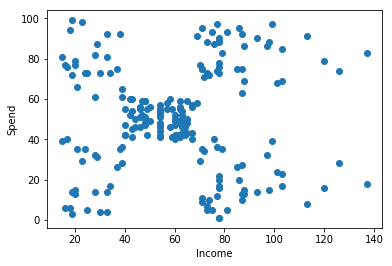

In [13]:
plt.scatter(X,Y)

plt.xlabel('Income',fontsize=10)
plt.ylabel('Spend',fontsize=10)

plt.show()

In [14]:
X=dataset.iloc[:,[3,4]].values

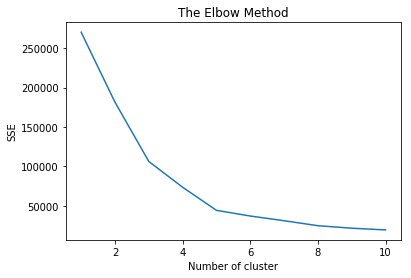

In [18]:
#Using the elbow method to find the optimal number of clusters

ls=[]
for i in range(1,11):
    km=KMeans(n_clusters=i)
    km.fit(X)
    ls.append(km.inertia_)
    
plt.plot(range(1,11),ls)
plt.title('The Elbow Method')
plt.xlabel('Number of cluster')
plt.ylabel('SSE')
plt.show()

In [19]:
#FItting K-means to the dataset
km=KMeans(n_clusters=5)
y_kmeans=km.fit_predict(X)

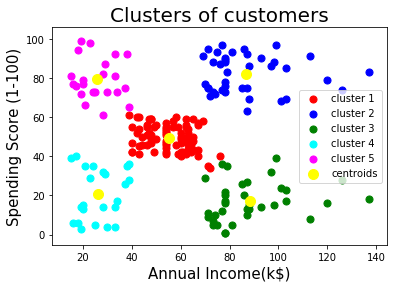

In [36]:
#Visualising the cluster
plt.scatter(X[y_kmeans==0,0],X[y_kmeans==0,1],s=50,c='red',label='cluster 1')
plt.scatter(X[y_kmeans==1,0],X[y_kmeans==1,1],s=50,c='blue',label='cluster 2')
plt.scatter(X[y_kmeans==2,0],X[y_kmeans==2,1],s=50,c='green',label='cluster 3')
plt.scatter(X[y_kmeans==3,0],X[y_kmeans==3,1],s=50,c='cyan',label='cluster 4')
plt.scatter(X[y_kmeans==4,0],X[y_kmeans==4,1],s=50,c='magenta',label='cluster 5')

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],s=100,c='yellow',label='centroids')

plt.title('Clusters of customers',fontsize=20)
plt.xlabel('Annual Income(k$)',fontsize=15)
plt.ylabel('Spending Score (1-100)',fontsize=15)
plt.legend()
plt.show()

In [32]:
print('The centers of cluster are:\n',km.cluster_centers_)

The centers of cluster are:
 [[55.2962963  49.51851852]
 [86.53846154 82.12820513]
 [88.2        17.11428571]
 [26.30434783 20.91304348]
 [25.72727273 79.36363636]]


In [58]:
print('Cluster Labels:',km.labels_)
x=pd.Series(km.labels_)
dataset['class']=x

Cluster Labels: [3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3
 4 3 4 3 4 3 0 3 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 0 1 2 1 2 1 0 1 2 1 2 1 2 1 2 1 0 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]


In [43]:
X[y_kmeans==3,0]

array([15, 16, 17, 18, 19, 19, 20, 20, 21, 23, 24, 25, 28, 28, 29, 30, 33,
       33, 34, 37, 38, 39, 39], dtype=int64)

In [44]:
X[y_kmeans==3,1]

array([39,  6, 40,  6,  3, 14, 15, 13, 35, 29, 35,  5, 14, 32, 31,  4,  4,
       14, 17, 26, 35, 36, 28], dtype=int64)

## Hierarchy

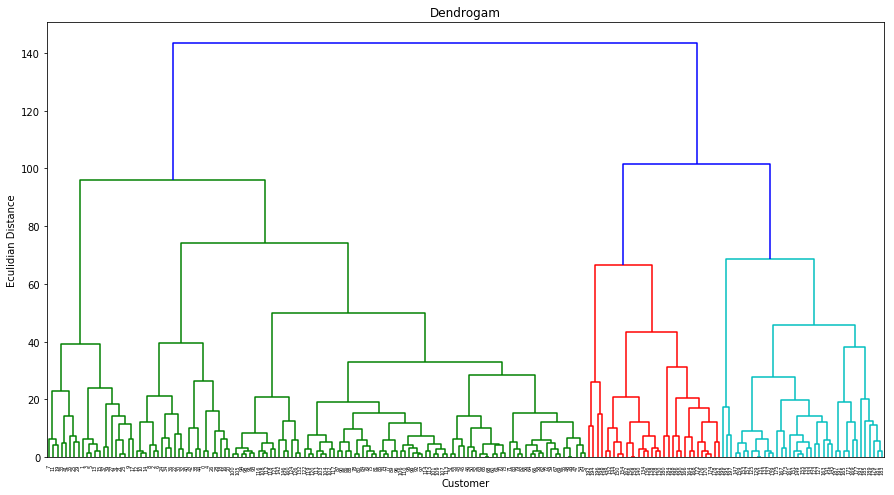

In [48]:
import scipy.cluster.hierarchy as sch

plt.figure(figsize=(15,8))
dendrogram=sch.dendrogram(sch.linkage(X,method='complete'))

plt.title('Dendrogam')
plt.xlabel('Customer')
plt.ylabel('Eculidian Distance')
plt.show()

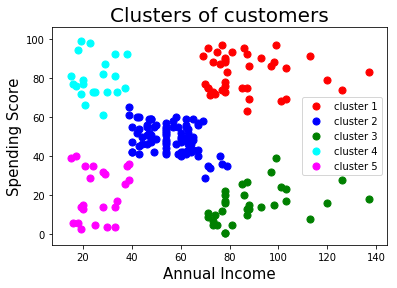

In [51]:
#FItting Hierarchical clustering to the dataset
from sklearn.cluster import AgglomerativeClustering
hc=AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='complete')
y_hc=hc.fit_predict(X)

plt.scatter(X[y_hc==0,0],X[y_hc==0,1],s=50,c='red',label='cluster 1')
plt.scatter(X[y_hc==1,0],X[y_hc==1,1],s=50,c='blue',label='cluster 2')
plt.scatter(X[y_hc==2,0],X[y_hc==2,1],s=50,c='green',label='cluster 3')
plt.scatter(X[y_hc==3,0],X[y_hc==3,1],s=50,c='cyan',label='cluster 4')
plt.scatter(X[y_hc==4,0],X[y_hc==4,1],s=50,c='magenta',label='cluster 5')


plt.title('Clusters of customers',fontsize=20)
plt.xlabel('Annual Income',fontsize=15)
plt.ylabel('Spending Score',fontsize=15)
plt.legend()
plt.show()

In [52]:
hc.labels_

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 2, 0, 2, 0,
       1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 1, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0], dtype=int64)

In [59]:
dataset.head()

,CustomerID,Genre,Age,Income,SpendingScore,class
0,1,Male,19,15,39,3
1,2,Male,21,15,81,4
2,3,Female,20,16,6,3
3,4,Female,23,16,77,4
4,5,Female,31,17,40,3


In [67]:
dataset.to_excel(r'C:\Users\Abhi\Desktop\Class Document\mall.xlsx')